
EXPERIMENT 1


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


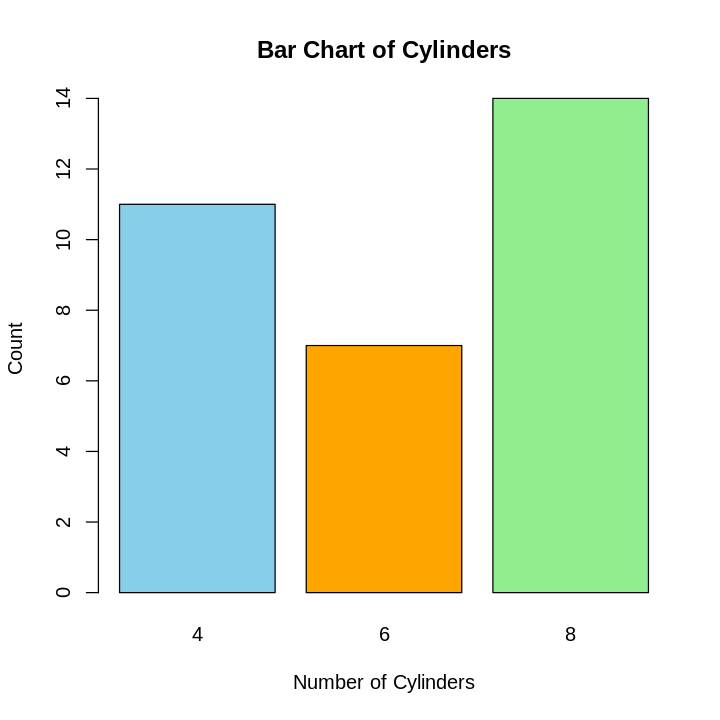

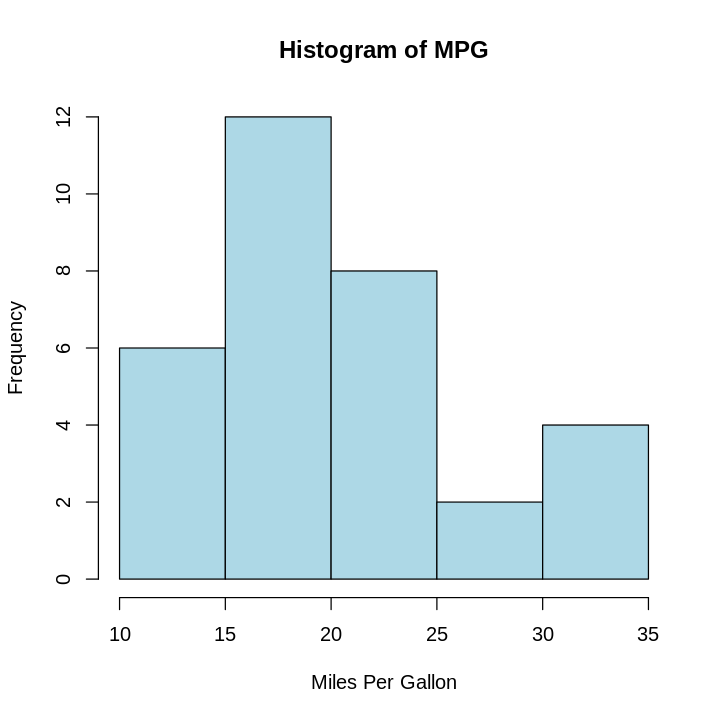

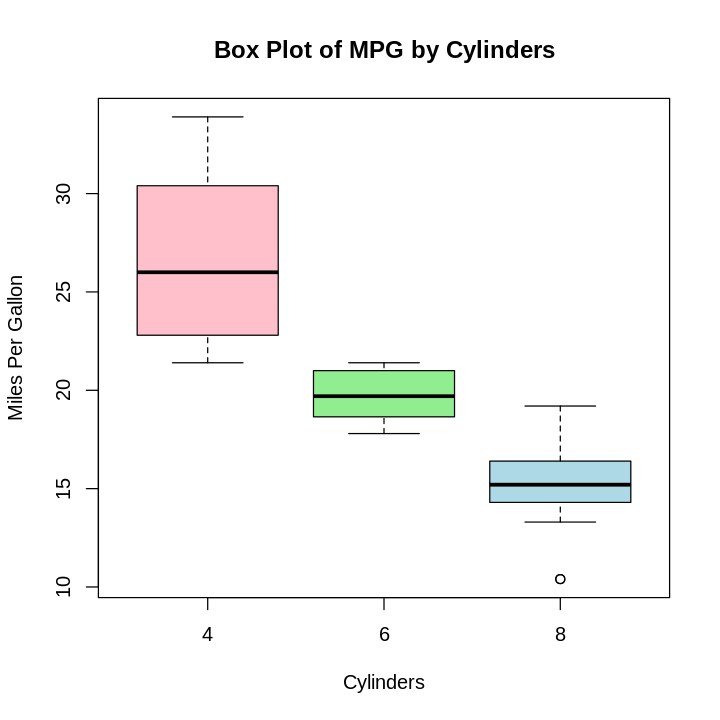

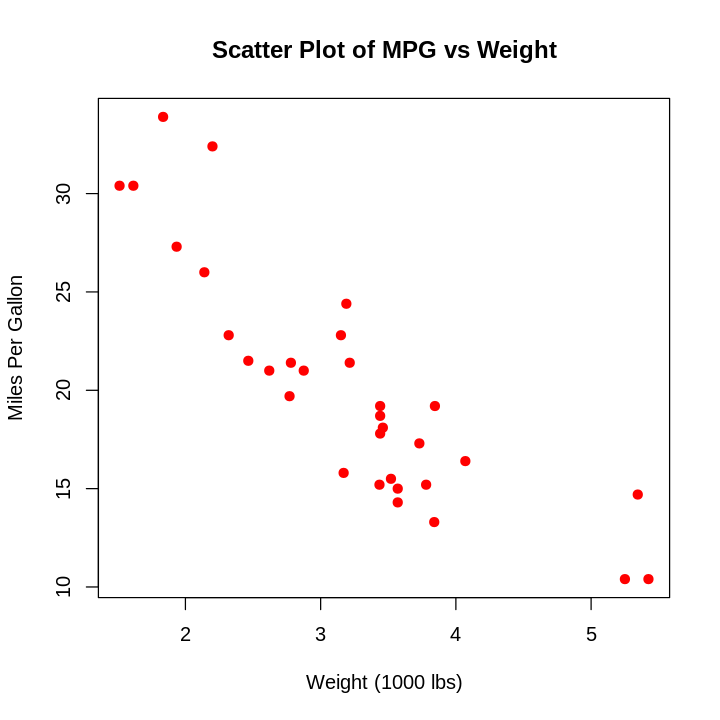

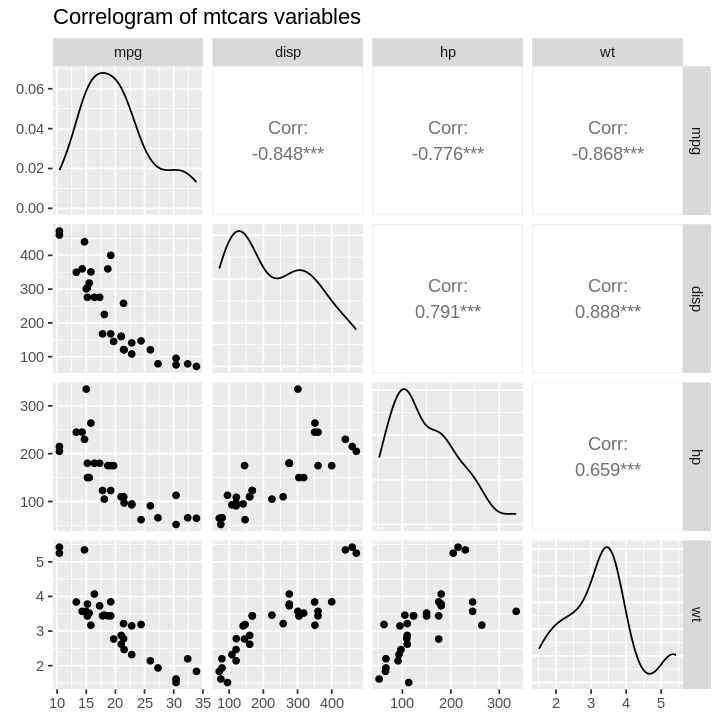

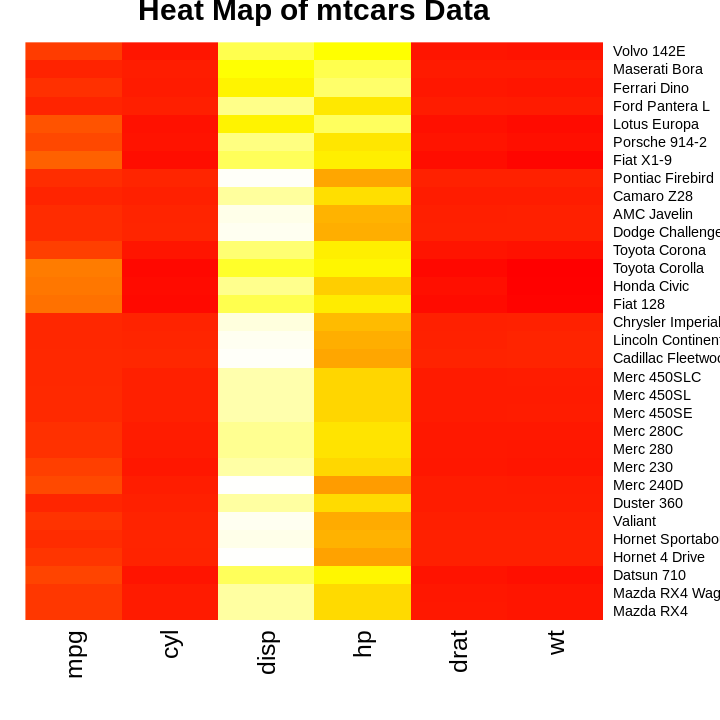

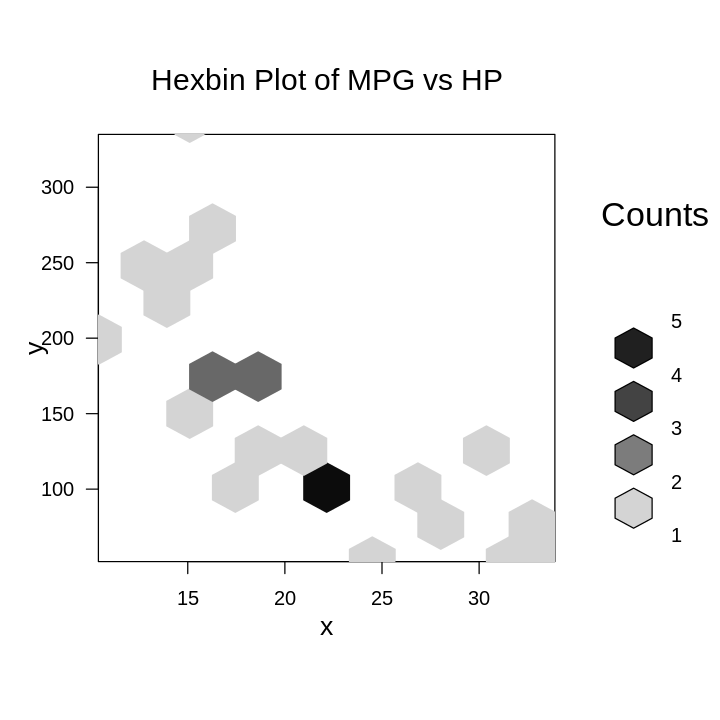

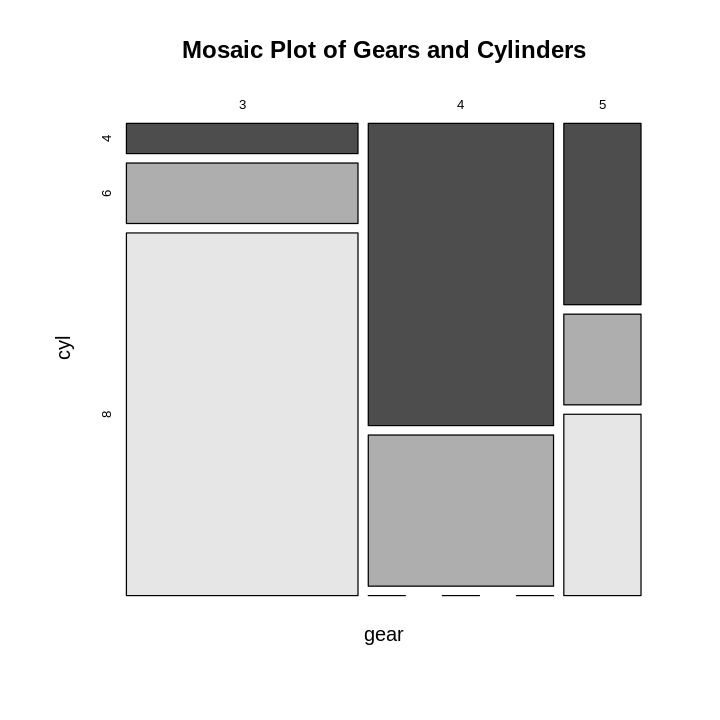

In [10]:
# Set plot size
options(repr.plot.width=6, repr.plot.height=6)

# Load dataset
data(mtcars)
head(mtcars)

# 1. Bar Chart
barplot(table(mtcars$cyl),
        main = "Bar Chart of Cylinders",
        xlab = "Number of Cylinders",
        ylab = "Count",
        col = c("skyblue", "orange", "lightgreen"))

# 2. Histogram
hist(mtcars$mpg,
     main = "Histogram of MPG",
     xlab = "Miles Per Gallon",
     col = "lightblue",
     border = "black")

# 3. Box Plot
boxplot(mtcars$mpg ~ mtcars$cyl,
        main = "Box Plot of MPG by Cylinders",
        xlab = "Cylinders",
        ylab = "Miles Per Gallon",
        col = c("pink", "lightgreen", "lightblue"))

# 4. Scatter Plot
plot(mtcars$wt, mtcars$mpg,
     main = "Scatter Plot of MPG vs Weight",
     xlab = "Weight (1000 lbs)",
     ylab = "Miles Per Gallon",
     col = "red", pch = 19)

# 5. Correlogram
library(GGally) # Load the GGally library
ggpairs(mtcars[, c("mpg", "disp", "hp", "wt")],
        title = "Correlogram of mtcars variables")

# 6. Heat Map
heatmap(as.matrix(mtcars[, 1:6]),
        main = "Heat Map of mtcars Data",
        Colv = NA, Rowv = NA, col = heat.colors(256))

# 7. Hexbin Plot
library(hexbin) # Load the hexbin library
x <- mtcars$mpg
y <- mtcars$hp
bin <- hexbin(x, y, xbins = 10)
plot(bin, main = "Hexbin Plot of MPG vs HP")

# 8. Mosaic Plot
mosaicplot(~gear + cyl,
           data = mtcars,
           color = TRUE,
           main = "Mosaic Plot of Gears and Cylinders")

In [9]:
install.packages("hexbin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



EXPERIMENT 2

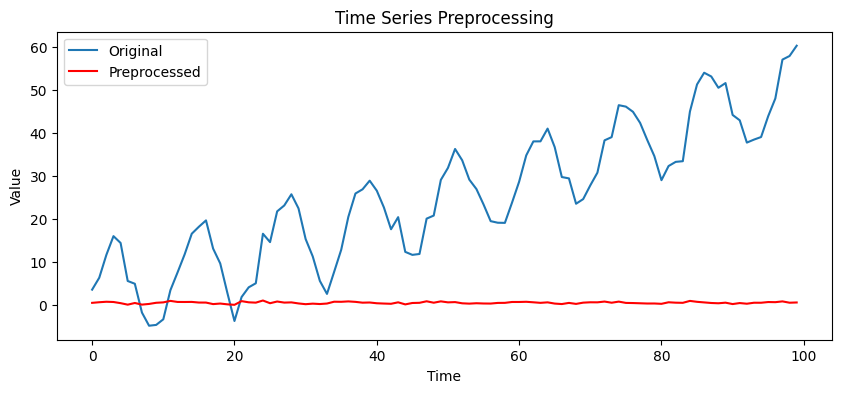

   Time      Value     Power      Diff       Std      Norm
0     0   3.528105 -1.375868       NaN -0.113236  0.456719
1     1   6.300314 -1.167813  0.208055  0.576118  0.600282
2     2  11.617730 -0.797520  0.370293  1.113668  0.712231
3     3  15.981786 -0.510932  0.286588  0.836327  0.654472
4     4  14.395370 -0.613715 -0.102783 -0.453791  0.385796


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

# Sample time series data
np.random.seed(0)
time = np.arange(100)
data = 0.5*time + 10*np.sin(2*np.pi*time/12) + np.random.normal(0, 2, 100)
df = pd.DataFrame({'Time': time, 'Value': data})

# Power Transform
df['Power'] = PowerTransformer(method='yeo-johnson').fit_transform(df[['Value']])

# Differencing
df['Diff'] = df['Power'].diff()

# Standardization
df['Std'] = StandardScaler().fit_transform(df[['Diff']].fillna(0))

# Normalization
df['Norm'] = MinMaxScaler().fit_transform(df[['Std']])

# Plot results
plt.figure(figsize=(10,4))
plt.plot(df['Time'], df['Value'], label='Original')
plt.plot(df['Time'], df['Norm'], label='Preprocessed', color='red')
plt.title('Time Series Preprocessing')
plt.xlabel('Time'); plt.ylabel('Value'); plt.legend(); plt.show()

print(df.head())


EXPERIMENT 3

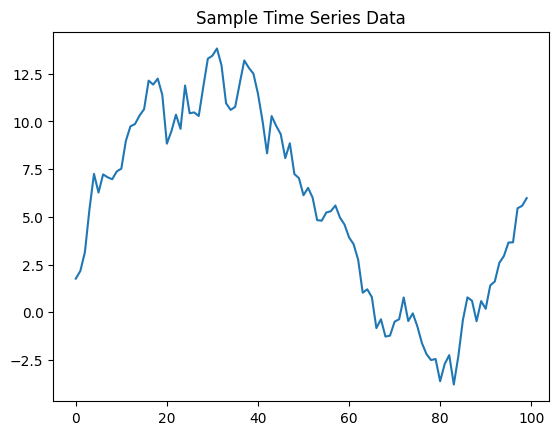

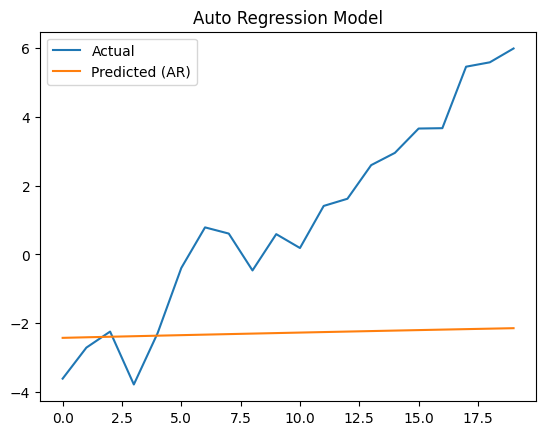

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


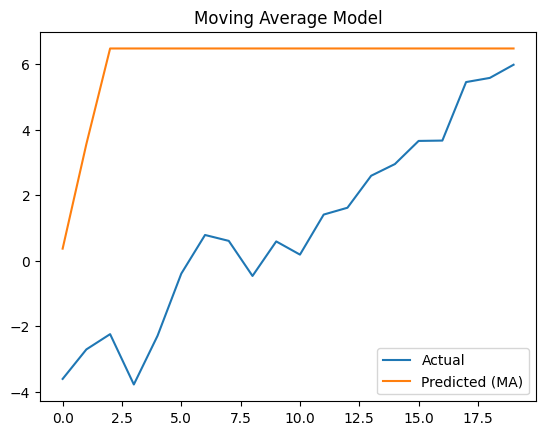

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# --- Generate sample time series data ---
np.random.seed(0)
data = np.cumsum(np.random.randn(100))  # random walk
plt.plot(data)
plt.title("Sample Time Series Data")
plt.show()

# --- Auto Regression (AR) model ---
train, test = data[:80], data[80:]
model_ar = AutoReg(train, lags=2).fit()
pred_ar = model_ar.predict(start=len(train), end=len(data)-1)
plt.plot(test, label='Actual')
plt.plot(pred_ar, label='Predicted (AR)')
plt.legend()
plt.title("Auto Regression Model")
plt.show()

# --- Moving Average (MA) model ---
model_ma = ARIMA(train, order=(0,0,2)).fit()
pred_ma = model_ma.forecast(steps=20)
plt.plot(test, label='Actual')
plt.plot(pred_ma, label='Predicted (MA)')
plt.legend()
plt.title("Moving Average Model")
plt.show()


EXPERIMENT 4

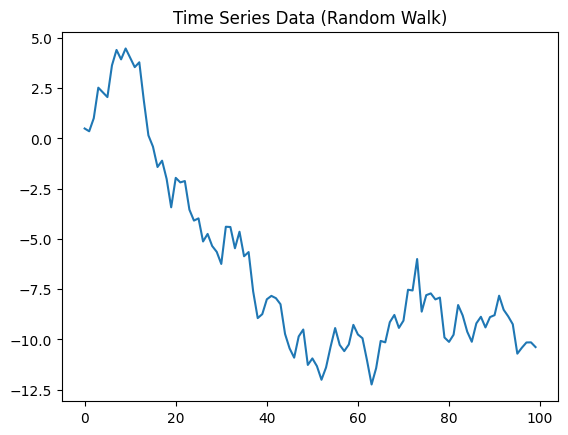

ADF Statistic: -1.3583
p-value: 0.6021
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583

❌ The series is non-stationary. Differencing needed.


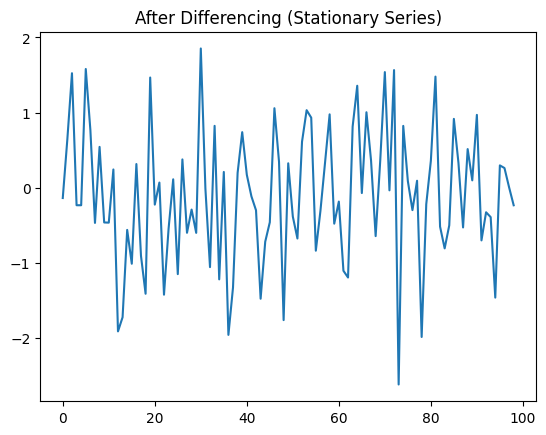


After Differencing:
ADF Statistic: -10.0089
p-value: 0.0000
✅ Now the series is stationary.


In [ ]:
# --- Import libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- Generate sample non-stationary data (random walk) ---
np.random.seed(42)
data = np.cumsum(np.random.randn(100))  # cumulative sum creates trend
plt.plot(data)
plt.title("Time Series Data (Random Walk)")
plt.show()

# --- Apply ADF Test ---
result = adfuller(data)
print("ADF Statistic: %.4f" % result[0])
print("p-value: %.4f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

# --- Interpret result ---
if result[1] <= 0.05:
    print("\n✅ The series is stationary.")
else:
    print("\n❌ The series is non-stationary. Differencing needed.")

# --- Apply differencing if non-stationary ---
diff_data = np.diff(data)
plt.plot(diff_data)
plt.title("After Differencing (Stationary Series)")
plt.show()

# --- Check stationarity again ---
result_diff = adfuller(diff_data)
print("\nAfter Differencing:")
print("ADF Statistic: %.4f" % result_diff[0])
print("p-value: %.4f" % result_diff[1])
if result_diff[1] <= 0.05:
    print("✅ Now the series is stationary.")


EXPERIMENT 5

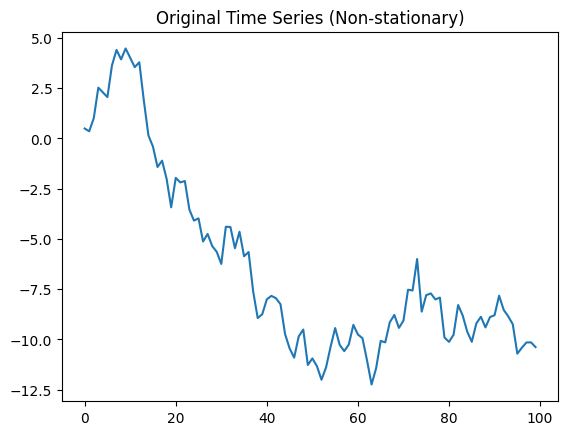

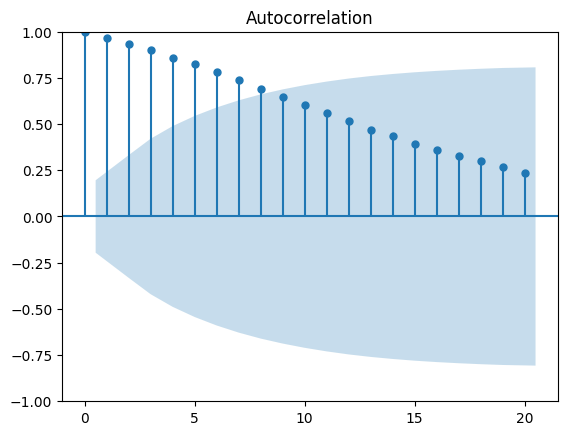

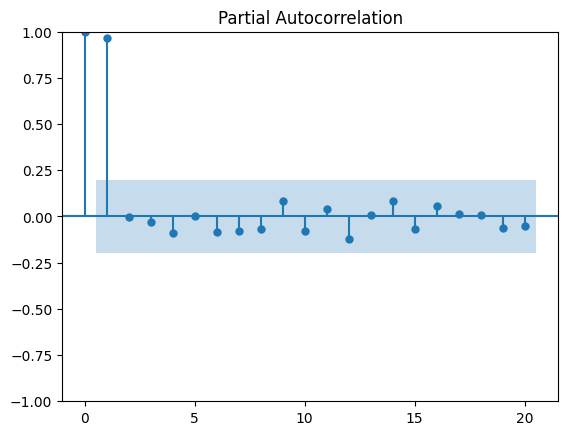

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.425
Date:                Wed, 15 Oct 2025   AIC                            268.850
Time:                        01:43:04   BIC                            276.635
Sample:                             0   HQIC                           272.000
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3997      5.647      0.071      0.944     -10.669      11.468
ma.L1         -0.4157      5.589     -0.074      0.941     -11.371      10.539
sigma2         0.8329      0.123      6.780      0.0

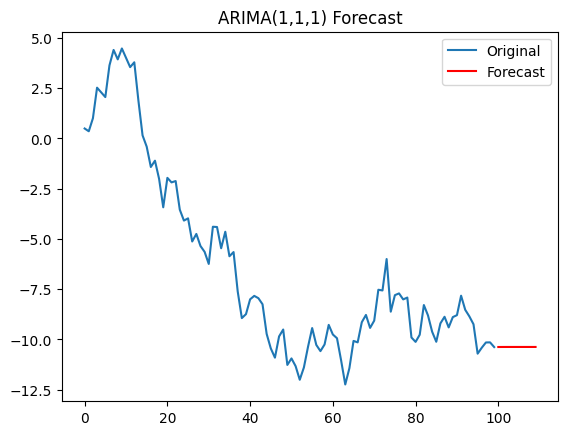

In [ ]:
# --- Import required libraries ---
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Generate sample data (non-stationary time series) ---
np.random.seed(42)
data = np.cumsum(np.random.randn(100))  # Random walk
plt.plot(data)
plt.title("Original Time Series (Non-stationary)")
plt.show()

# --- Plot ACF and PACF ---
plot_acf(data, lags=20)
plt.show()
plot_pacf(data, lags=20)
plt.show()

# --- Fit ARIMA model (p=1, d=1, q=1) ---
model = ARIMA(data, order=(1,1,1))
fit = model.fit()
print(fit.summary())

# --- Forecast future values ---
forecast = fit.forecast(steps=10)
plt.plot(range(len(data)), data, label='Original')
plt.plot(range(len(data), len(data)+10), forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA(1,1,1) Forecast")
plt.show()


EXPERIMENT 6

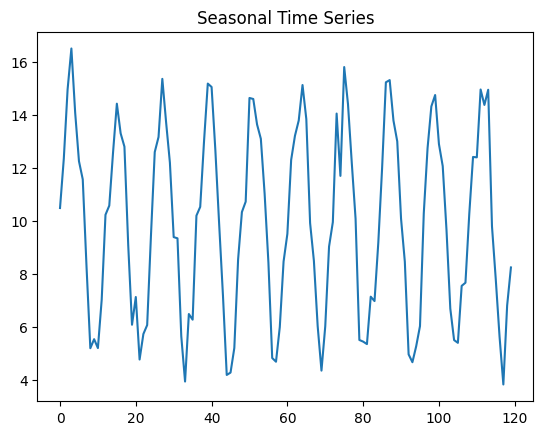

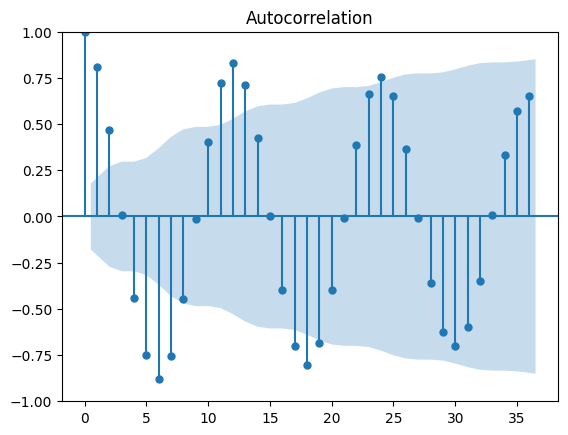

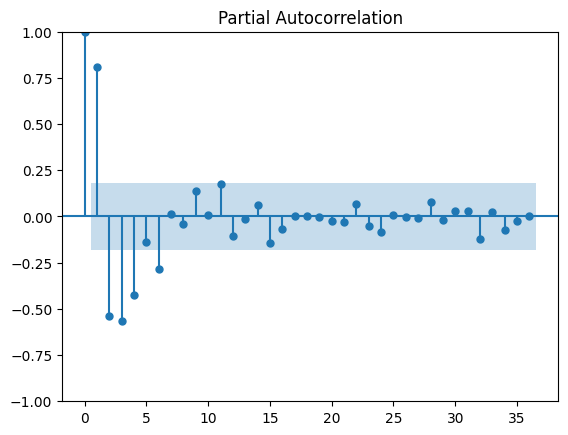

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -157.660
Date:                            Wed, 15 Oct 2025   AIC                            325.319
Time:                                    01:44:31   BIC                            338.684
Sample:                                         0   HQIC                           330.737
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0015      0.130      0.012      0.991      -0.254       0.257
ma.L1         -0.9985      1.557   

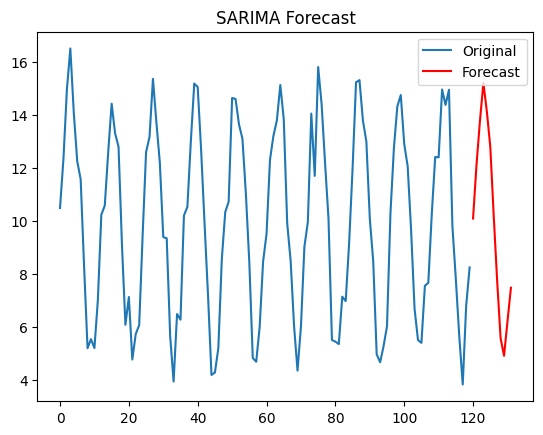

In [ ]:
# --- Import required libraries ---
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Generate sample seasonal data ---
np.random.seed(42)
time = np.arange(120)
seasonal = 10 + 5 * np.sin(2 * np.pi * time / 12)  # seasonal component
noise = np.random.randn(120)
data = seasonal + noise

plt.plot(data)
plt.title("Seasonal Time Series")
plt.show()

# --- Plot ACF and PACF for seasonal identification ---
plot_acf(data, lags=36)
plt.show()
plot_pacf(data, lags=36)
plt.show()

# --- Fit SARIMA model ---
# SARIMA(p,d,q)(P,D,Q,m)
model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))
fit = model.fit(disp=False)
print(fit.summary())

# --- Forecast next 12 periods ---
forecast = fit.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
plt.plot(data, label='Original')
plt.plot(np.arange(len(data), len(data)+12), forecast_mean, color='red', label='Forecast')
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


EXPERIMENT 7

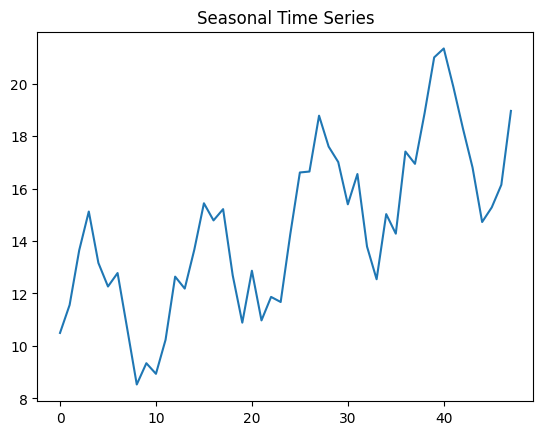

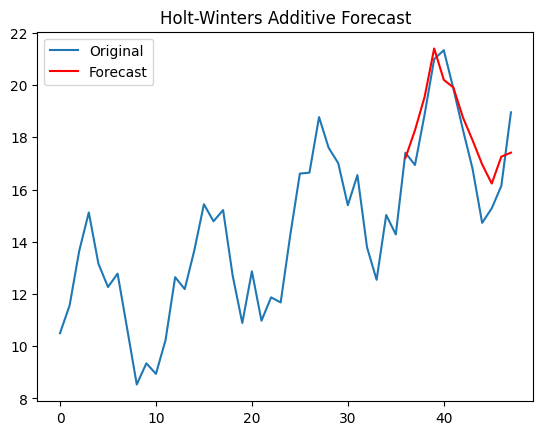

Mean Squared Error: 1.2240889491787457


In [ ]:
# --- Import required libraries ---
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Generate sample seasonal data ---
np.random.seed(42)
time = np.arange(48)
seasonal = 10 + 3 * np.sin(2 * np.pi * time / 12)  # seasonal pattern
trend = 0.2 * time
noise = np.random.randn(48)
data = seasonal + trend + noise

plt.plot(data)
plt.title("Seasonal Time Series")
plt.show()

# --- Split data into train and test ---
train, test = data[:36], data[36:]

# --- Apply Triple Exponential Smoothing (Holt-Winters) ---
# Additive seasonality
tes_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
tes_fit = tes_model.fit(optimized=True)
forecast = tes_fit.forecast(steps=len(test))

# --- Plot original and forecast ---
plt.plot(np.arange(len(data)), data, label='Original')
plt.plot(np.arange(36, 48), forecast, color='red', label='Forecast')
plt.title("Holt-Winters Additive Forecast")
plt.legend()
plt.show()

# --- Accuracy check (optional) ---
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)


EXPERIMENT 8

In [ ]:
# --- Vectors ---
apple <- c('red','green','yellow')
print(apple)
print(class(apple))

# --- Lists ---
list1 <- list(c(2,5,3), 21.3, sin)
print(list1)

# --- Matrices ---
M <- matrix(c('a','a','b','c','b','a'), nrow=2, ncol=3, byrow=TRUE)
print(M)

# --- Arrays ---
a <- array(c('green','yellow'), dim=c(3,3,2))
print(a)

# --- Factors ---
apple_colors <- c('green','green','yellow','red','red','red','green')
factor_apple <- factor(apple_colors)
print(factor_apple)
print(nlevels(factor_apple))

# --- Data Frames ---
BMI <- data.frame(
  gender = c("Male", "Male", "Female"),
  height = c(152, 171.5, 165),
  weight = c(81, 93, 78),
  Age = c(42, 38, 26)
)
print(BMI)


[1] "red"    "green"  "yellow"
[1] "character"
[[1]]
[1] 2 5 3

[[2]]
[1] 21.3

[[3]]
function (x)  .Primitive("sin")

     [,1] [,2] [,3]
[1,] "a"  "a"  "b" 
[2,] "c"  "b"  "a" 
, , 1

     [,1]     [,2]     [,3]    
[1,] "green"  "yellow" "green" 
[2,] "yellow" "green"  "yellow"
[3,] "green"  "yellow" "green" 

, , 2

     [,1]     [,2]     [,3]    
[1,] "yellow" "green"  "yellow"
[2,] "green"  "yellow" "green" 
[3,] "yellow" "green"  "yellow"

[1] green  green  yellow red    red    red    green 
Levels: green red yellow
[1] 3
  gender height weight Age
1   Male  152.0     81  42
2   Male  171.5     93  38
3 Female  165.0     78  26
